In [1]:
import cv2
from ultralytics import YOLO
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
list_point_names = ["nose", "left_eye", "right_eye", "left_ear", "right_ear", "left_shoulder",
                    "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist",
                    "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle"]
len(list_point_names)

17


0: 448x640 7 persons, 549.5ms
Speed: 0.0ms preprocess, 549.5ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


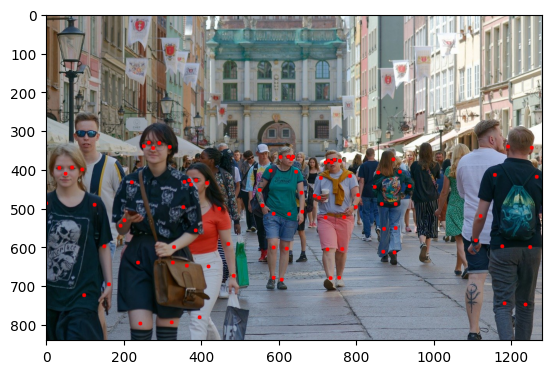

In [4]:
model = YOLO('yolov8m-pose.pt')
image = cv2.imread('images/tourists.jpg')
results = model.predict(image, iou=0.4, conf=0.8)

for i in range(len(results[0].keypoints.xy)):
    keypoints = results[0].keypoints.xy[i]
    for j, point in enumerate(keypoints):
        x, y = point
        if x >= 0 and y >= 0:
            cv2.circle(image, (int(x), int(y)), 5, (0,0,255), -1)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image);